In [ ]:
#Load all the essential packages for the analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
from matplotlib.lines import Line2D


#Font settings
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath, amssymb}"


#Color schemes
COLORS = ["#42AED0", "#D06442"]
COLORS2 = ["#7FCA93","#7F91CA","#CA7FB6"]

# Data

For the figures in this notebook, download the following datafiles and insert them into the correct folder. 

results/

&nbsp;&nbsp;&nbsp;&nbsp;jee/
- jee_with_bt.parquet

&nbsp;&nbsp;&nbsp;&nbsp;cmcqrd/
- cmcqrd_with_bt.parquet
- cmcqrd_with_labels.parquet

&nbsp;&nbsp;&nbsp;&nbsp;omni/
- omni_with_bt.parquet
- omni_with_labels
- omni_with_performance.parquet
- omni_o3_noise_alpha_0.01.parquet
- omni_o3_noise_alpha_0.02.parquet
- omni_o3_noise_alpha_0.05.parquet
- omni_o3_noise_alpha_0.1.parquet

# Figure 2

(Left) LLM compare (our method) correlates positively with all existing types of difficulty measures: human labels, human performance, LLM labels, LLM performance. (Right) LLM compare is model-agnostic. The overview table (right corner) was added seperately in tex (as a tikz figure).

In [2]:
#---------------------------------------- Dataframes human-based difficulty measures ----------------------------------------

# JEE
df_jee = pd.read_parquet("../results/jee/jee_with_bt.parquet")
human_performance_jee = df_jee["Difficulty"].astype(float).to_numpy()
bt_scores_jee = {
    "o3_BT": df_jee["o3_bt"].astype(float).to_numpy(),
    "gemini_BT": df_jee["gemini_bt"].astype(float).to_numpy(),
}
df_human_scores_jee = (
    pd.Series(bt_scores_jee)
    .explode()
    .reset_index(name="value")
    .rename(columns={"index": "key"})
)
df_human_scores_jee["human"] = np.tile(human_performance_jee,2)

# CMCQRD
df_cmcqrd = pd.read_parquet("../results/cmcqrd/cmcqrd_with_bt.parquet")
human_performance_cmcqrd = df_cmcqrd["question_diff"].astype(float).to_numpy()
bt_scores_cmcqrd = {
    "o3_BT": df_cmcqrd["o3_bt"].astype(float).to_numpy(),
    "gemini_BT": df_cmcqrd["gemini_bt"].astype(float).to_numpy(),
}
df_human_scores_cmcqrd = (
    pd.Series(bt_scores_cmcqrd)
    .explode()
    .reset_index(name="value")
    .rename(columns={"index": "key"})
)
df_human_scores_cmcqrd["human"] = np.tile(human_performance_cmcqrd,2)

# Omni-Math
df_omni = pd.read_parquet("../results/omni/omni_with_bt.parquet")
human_judgement_omni = df_omni["difficulty"].astype(float).to_numpy()
bt_scores_omni = {
    "o3_BT": df_omni["o3_bt"].astype(float).to_numpy(),  # Add gemini scores later
    "gemini_BT": df_omni["gemini_bt"].astype(float).to_numpy(),
}
df_human_scores_omni = (
    pd.Series(bt_scores_omni)
    .explode()
    .reset_index(name="value")
    .rename(columns={"index": "key"})
)
df_human_scores_omni["human"] = np.tile(human_judgement_omni, 2)


#---------------------------------------- Dataframes LLM-based difficulty measures ----------------------------------------

#CMCQRD
df_cmcqrd_labels = pd.read_parquet("../results/cmcqrd/cmcqrd_with_labels.parquet")
llm_labels_cmcqrd = df_cmcqrd_labels['o3_label'].astype(float).to_numpy()
df_llm_scores_cmcqrd = (
    pd.Series(bt_scores_cmcqrd)
    .explode()
    .reset_index(name="value")
    .rename(columns={"index": "key"})
)   
df_llm_scores_cmcqrd["labels"] = np.tile(llm_labels_cmcqrd, 2)


#Omni-Math
df_omni_performance = pd.read_parquet("../results/omni/omni_with_performance.parquet")
df_omni_performance['o3_score'] = df_omni_performance["o3_score"].apply(lambda x: 1-x % 2) #turn it into measure of difficulty
llm_performance_omni = df_omni_performance["o3_score"].astype(float).to_numpy()
center_of_mass_1 = np.mean(df_omni["o3_bt"][df_omni_performance["o3_score"] == 1])
center_of_mass_0 = np.mean(df_omni["o3_bt"][df_omni_performance["o3_score"] == 0])
#print(f"Center of mass for  o3_score = 1: {center_of_mass_1}")
#print(f"Center of mass for  o3_score = 0: {center_of_mass_0}")


df_llm_scores_omni = (
    pd.Series(bt_scores_omni)
    .explode()
    .reset_index(name="value")
    .rename(columns={"index": "key"})
)
df_llm_scores_omni["performance"] = np.tile(llm_performance_omni, 2)


# Add LLM labels as well
df_omni_labels = pd.read_parquet("../results/omni/omni_with_labels.parquet")
llm_labels_omni = df_omni_labels["o3_label"].astype(float).to_numpy()
df_llm_scores_omni['labels'] = np.tile(llm_labels_omni, 2)


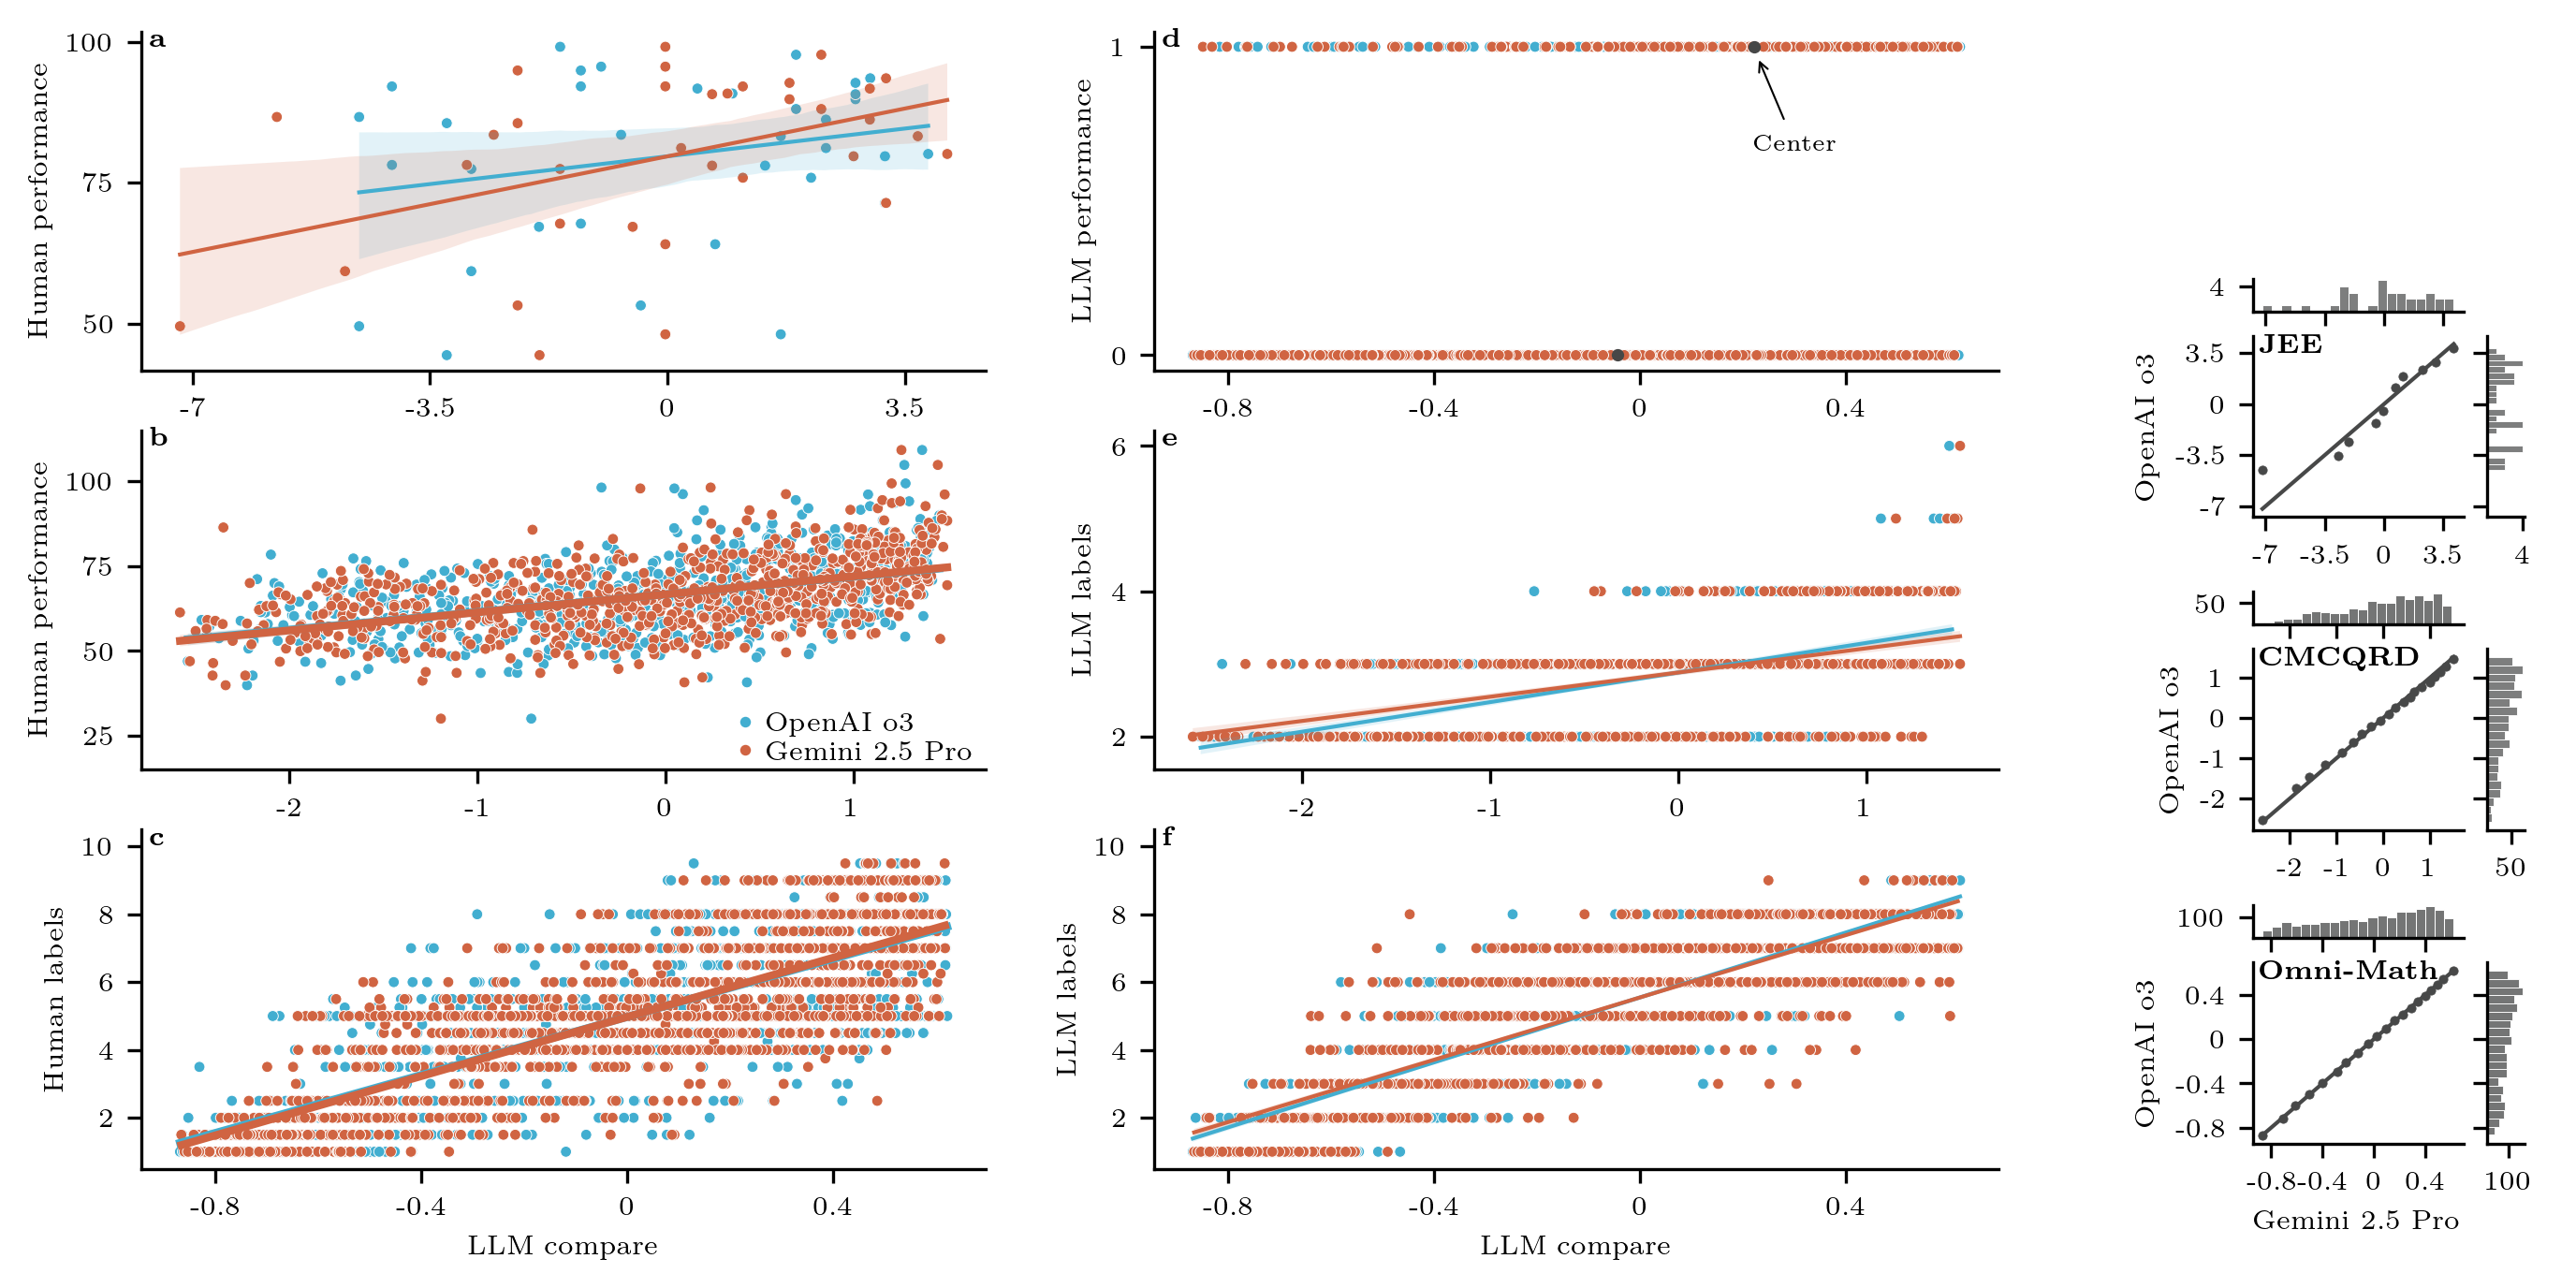

In [ ]:
Figure2 = plt.figure(figsize=(9, 4.5), dpi=300)

subfig_left, subfig_right = Figure2.subfigures(1, 2, wspace=0.1, width_ratios=[6, 1])

#Left
ax2a = subfig_left.subplot_mosaic(
    [
        ["A","A","A","B","B","B"],
        ["A","A","A","B","B","B"],
        ["A","A","A","B","B","B"],
        ["A","A","A","B","B","B"],
        ["C","C","C","D","D","D"],
        ["C","C","C","D","D","D"],
        ["C","C","C","D","D","D"],
        ["C","C","C","D","D","D"],
        ["E","E","E","F","F","F"],
        ["E","E","E","F","F","F"],
        ["E","E","E","F","F","F"],
        ["E","E","E","F","F","F"],
    ],
    gridspec_kw=dict(hspace=1.5, wspace=1)  
)

#Right
ax2b = subfig_right.subplot_mosaic(
    [
        ["T","T","T"],
        ["T","T","T"],
        ["T","T","T"],
        ["A1","A1","A4"],
        ["A2","A2","A3"],
        ["A2","A2","A3"],
        ["B1","B1","B4"],
        ["B2","B2","B3"],
        ["B2","B2","B3"],
        ["C1","C1","C4"],
        ["C2","C2","C3"],
        ["C2","C2","C3"],
    ],
    gridspec_kw=dict(hspace=1, wspace=1), height_ratios=[0.5, 0.5, 0.5, 0.5, 1, 1, 0.5, 1, 1, 0.5, 1, 1], width_ratios=[1, 1, 0.5] 
)

for sf in (subfig_left, subfig_right):
    sf.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)


#---------------------------------------- Left subfigure ----------------------------------------

# Panel A
sns.scatterplot(
    data=df_human_scores_jee,
    y="human",
    x="value",
    hue="key",
    palette=COLORS,
    s=8,
    hue_order=[
        "o3_BT", "gemini_BT"
    ],
    ax=ax2a["A"],
)
sns.regplot(
    y=human_performance_jee,
    x=bt_scores_jee["o3_BT"],
    color=COLORS[0],
    line_kws={"linewidth": 1},
    scatter=False,
    ax=ax2a["A"],
)
sns.regplot(
    y=human_performance_jee,
    x=bt_scores_jee["gemini_BT"],
    color=COLORS[1],
    line_kws={"linewidth": 1},
    scatter=False,
    ax=ax2a["A"],
)


ax2a["A"].set_xlabel("", fontsize=7)
ax2a["A"].set_ylabel(r"Human performance", fontsize=7)
ax2a["A"].set_yticks(
    ticks=[50,75,100],
    labels=["50","75","100"],
    fontsize=7
)
ax2a["A"].set_xticks(
    ticks=[-7,-3.5,0,3.5],
    labels=["-7","-3.5","0","3.5"],
    fontsize=7
)
ax2a["A"].set_title("")
ax2a["A"].grid(False)
sns.despine(ax=ax2a["A"],left=False, bottom=False)

ax2a["A"].get_legend().set_visible(False)


# Panel C
sns.scatterplot(
    data=df_human_scores_cmcqrd,
    y="human",
    x="value",
    hue="key",
    palette=COLORS,
    s=8,
    hue_order=[
        "o3_BT", "gemini_BT"
    ],
    ax=ax2a["C"],
)

sns.regplot(
    y=human_performance_cmcqrd,
    x=bt_scores_cmcqrd["o3_BT"],
    color=COLORS[0],
    line_kws={"linewidth": 2},
    scatter=False,
    ax=ax2a["C"],
)
sns.regplot(
    y=human_performance_cmcqrd,
    x=bt_scores_cmcqrd["gemini_BT"],
    color=COLORS[1],
    line_kws={"linewidth": 2},
    scatter=False,
    ax=ax2a["C"],
)

ax2a["C"].set(ylim=(15, 115))
ax2a["C"].set_xlabel("", fontsize=7)
ax2a["C"].set_ylabel(r"Human performance", fontsize=7)
ax2a["C"].set_yticks(
    ticks=[25, 50, 75, 100],
    labels=["25", "50", "75", "100"],
    fontsize=7
)
ax2a["C"].set_xticks(
    ticks=[-2, -1, 0, 1],
    labels=["-2", "-1", "0", "1"],
    fontsize=7
)
ax2a["C"].set_title("")
ax2a["C"].grid(False)
sns.despine(ax=ax2a["C"], left=False, bottom=False)

ax2a["C"].get_legend().set_visible(False)


# Panel E
sns.scatterplot(
    data=df_human_scores_omni,
    y="human",
    x="value",
    hue="key",
    palette=COLORS,
    s=8,
    hue_order=[
        "o3_BT", "gemini_BT"
    ],
    ax=ax2a["E"],
)

sns.regplot(
    y=human_judgement_omni,
    x=bt_scores_omni["o3_BT"],
    color=COLORS[0],
    line_kws={"linewidth": 2},
    scatter=False,
    ax=ax2a["E"],
)
sns.regplot(
      y=human_judgement_omni,
      x=bt_scores_omni["gemini_BT"],
      color=COLORS[1],
      line_kws={"linewidth": 2},
      scatter=False,
      ax=ax2a["E"],
  )

#ax2["E"].set(xlim=(-0.8, 0.7))
ax2a["E"].set(ylim=(0.5, 10.5))
ax2a["E"].set_xlabel(r"LLM compare", fontsize=7)
ax2a["E"].set_ylabel(r"Human labels", fontsize=7)
ax2a["E"].set_yticks(
    ticks=[2, 4, 6, 8, 10],
    labels=["2", "4", "6", "8", "10"],
    fontsize=7
)
ax2a["E"].set_xticks(
    ticks=[-0.8, -0.4, 0, 0.4],
    labels=["-0.8", "-0.4", "0", "0.4"],
    fontsize=7
)
ax2a["E"].set_title("")
ax2a["E"].grid(False)
sns.despine(ax=ax2a["E"], left=False, bottom=False)

ax2a["E"].get_legend().set_visible(False)


# Panel B
sns.scatterplot(
    data=df_llm_scores_omni,
    y="performance",
    x="value",
    hue="key",
    palette=COLORS,
    s=8,
    hue_order=[
        "o3_BT", "gemini_BT"
    ],
    ax=ax2a["B"],
)

sns.scatterplot(x=[center_of_mass_0, center_of_mass_1], y=[0,1], color='#464747', s=30, marker='.', ax=ax2a["B"], label='Center of mass', edgecolor = "#464747")

ax2a["B"].set_xlabel("", fontsize=7)
ax2a["B"].set_ylabel(r"LLM performance", fontsize=7)
ax2a["B"].set_yticks(
    ticks=[0,1],
    labels=["0","1"],
    fontsize=7
)
ax2a["B"].set_xticks(
    ticks=[-0.8, -0.4, 0, 0.4],
    labels=["-0.8", "-0.4", "0", "0.4"],
    fontsize=7
)
ax2a["B"].set_title("")
ax2a["B"].grid(False)
sns.despine(ax=ax2a["B"],left=False, bottom=False)

ax2a["B"].get_legend().set_visible(False)
#only center of mass in legend
ax2a["B"].annotate('Center', xy=(0.225, 0.98), xytext=(0.3, 0.65),
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=0.5),
             horizontalalignment='center', verticalalignment='bottom', fontsize=6)


# Panel D
sns.scatterplot(
    data = df_llm_scores_cmcqrd,
    x = "value",
    y = "labels",
    hue = "key",
    palette = COLORS,
    s = 8,
    hue_order = [
        "o3_BT", "gemini_BT"
    ],
    ax = ax2a["D"],
)

sns.regplot(
    y=llm_labels_cmcqrd,
    x=bt_scores_cmcqrd["o3_BT"],
    color=COLORS[0],
    line_kws={"linewidth": 1},
    scatter=False,
    ax=ax2a["D"],
)
sns.regplot(
    y=llm_labels_cmcqrd,
    x=bt_scores_cmcqrd["gemini_BT"],
    color=COLORS[1],
    line_kws={"linewidth": 1},
    scatter=False,
    ax=ax2a["D"],
)

ax2a["D"].set_xlabel("", fontsize=7)
ax2a["D"].set_ylabel(r"LLM labels", fontsize=7)
ax2a["D"].set_yticks(
    ticks=[2,4,6],
    labels=["2","4","6"],
    fontsize=7
)
ax2a["D"].set_xticks(
     ticks=[-2,-1,0,1],
     labels=["-2","-1","0","1"],
     fontsize=7
 )
ax2a["D"].set_title("")
ax2a["D"].grid(False)
sns.despine(ax=ax2a["D"],left=False, bottom=False)

ax2a["D"].get_legend().set_visible(False)

#Panel F
sns.scatterplot(
    data=df_llm_scores_omni,
    y="labels",
    x="value",
    hue="key",
    palette=COLORS,
    s=8,
    hue_order=[
        "o3_BT", "gemini_BT"
    ],
    ax=ax2a["F"],
)
sns.regplot(
    y=llm_labels_omni,
    x=bt_scores_omni["o3_BT"],
    color=COLORS[0],
    line_kws={"linewidth": 1},
    scatter=False,
    ax=ax2a["F"],
)
sns.regplot(
    y=llm_labels_omni,
    x=bt_scores_omni["gemini_BT"],
    color=COLORS[1],
    line_kws={"linewidth": 1},
    scatter=False,
    ax=ax2a["F"],
)
ax2a["F"].set(ylim=(0.5, 10.5))
ax2a["F"].set_xlabel("LLM compare", fontsize=7)
ax2a["F"].set_ylabel(r"LLM labels", fontsize=7)
ax2a["F"].set_yticks(
    ticks=[2,4,6,8,10],
    labels=["2","4","6","8","10"],
    fontsize=7
)
ax2a["F"].set_xticks(
    ticks=[-0.8, -0.4, 0, 0.4],
    labels=["-0.8", "-0.4", "0", "0.4"],
    fontsize=7
)
ax2a["F"].set_title("")
ax2a["F"].grid(False)
sns.despine(ax=ax2a["F"],left=False, bottom=False)

ax2a["F"].get_legend().set_visible(False)


# Titles
ax2a["B"].text(0.01, 1.01, r"\textbf{d}",
              transform=ax2a["B"].transAxes, fontsize=7,
              fontweight='bold', va='top', ha='left')
ax2a["D"].text(0.01, 1.01, r"\textbf{e}",
              transform=ax2a["D"].transAxes, fontsize=7,
              fontweight='bold', va='top', ha='left')
ax2a["F"].text(0.01, 1.01, r"\textbf{f}",
              transform=ax2a["F"].transAxes, fontsize=7,
             fontweight='bold', va='top', ha='left')
ax2a["A"].text(0.01, 1.01, r"\textbf{a}",
              transform=ax2a["A"].transAxes, fontsize=7,
             fontweight='bold', va='top', ha='left')
ax2a["C"].text(0.01, 1.01, r"\textbf{b}",
             transform=ax2a["C"].transAxes, fontsize=7,
             fontweight='bold', va='top', ha='left')
ax2a["E"].text(0.01, 1.01, r"\textbf{c}",
              transform=ax2a["E"].transAxes, fontsize=7,
              fontweight='bold', va='top', ha='left')


# Legend
labels = [
    r'OpenAI o3',
    r'Gemini 2.5 Pro',
]

handles = [
    *[
        Line2D([0], [0],
               marker='o', linestyle='None',
               markersize=2.75,
               markerfacecolor=c,
               markeredgecolor='none')
        for c in COLORS
    ]
]

Figure2.legend(
    handles, labels,
    loc='lower right', bbox_to_anchor=(0.38, 0.35),
    frameon=False, bbox_transform=Figure2.transFigure,
    fontsize=7, handlelength=1.1, handletextpad=0.25,labelspacing=0.15,
)


#---------------------------------------- Right subfigure -----------------------------------------

min_omni_bt = min(bt_scores_omni["o3_BT"].min(), bt_scores_omni["gemini_BT"].min())
max_omni_bt = max(bt_scores_omni["o3_BT"].max(), bt_scores_omni["gemini_BT"].max())
range_omni_bt = max_omni_bt - min_omni_bt

min_jee_bt = min(bt_scores_jee["o3_BT"].min(), bt_scores_jee["gemini_BT"].min())
max_jee_bt = max(bt_scores_jee["o3_BT"].max(), bt_scores_jee["gemini_BT"].max())
range_jee_bt = max_jee_bt - min_jee_bt

min_cmcqrd_bt = min(bt_scores_cmcqrd["o3_BT"].min(), bt_scores_cmcqrd["gemini_BT"].min())
max_cmcqrd_bt = max(bt_scores_cmcqrd["o3_BT"].max(), bt_scores_cmcqrd["gemini_BT"].max())
range_cmcqrd_bt = max_cmcqrd_bt - min_cmcqrd_bt

# Panel A
# A2
num_quantiles = 10
qs = np.linspace(0, 100, num_quantiles)

quantiles_gemini = np.percentile(bt_scores_jee["gemini_BT"], qs)
quantiles_o3 = np.percentile(bt_scores_jee["o3_BT"], qs)

sns.lineplot(x = [min_jee_bt, max_jee_bt], y = [min_jee_bt, max_jee_bt], color = '#474848', linewidth=1, linestyle='-', ax = ax2b['A2'])
sns.scatterplot(x = quantiles_gemini, y =quantiles_o3, color="#474848", s=5, alpha=1, ax = ax2b['A2'], edgecolor = None)


ax2b["A2"].set_xlim(min_jee_bt-0.05*range_jee_bt,max_jee_bt+0.05*range_jee_bt)
ax2b["A2"].set_ylim(min_jee_bt-0.05*range_jee_bt,max_jee_bt+0.05*range_jee_bt)
ax2b["A2"].set_xlabel("", fontsize=7)
ax2b["A2"].set_ylabel("OpenAI o3", fontsize=7)
ax2b["A2"].set_xticks(ticks=[-7, -3.5, 0, 3.5], labels=["-7", "-3.5", "0", "3.5"], fontsize=7)
ax2b["A2"].set_yticks(ticks=[-7, -3.5, 0, 3.5], labels=["-7", "-3.5", "0", "3.5"], fontsize=7)
ax2b["A2"].grid(False)
sns.despine(ax=ax2b["A2"], bottom=False, left=False)

posB2 = ax2b["A2"].get_position()
ax2b["A2"].set_position([posB2.x0+0.04, posB2.y0+0.02, posB2.width, posB2.height])

# Panel A4
ax2b["A4"].set_xticks([])
ax2b["A4"].set_yticks([])
ax2b["A4"].grid(False)
sns.despine(ax=ax2b["A4"], bottom=True, left=True, right=True, top=True)


# Panel A3
sns.histplot(
    data=bt_scores_jee,
    y="o3_BT",
    bins=20,
    edgecolor="white",
    alpha=0.7,
    color = "#464747",
    ax=ax2b["A3"],
)
ax2b["A3"].set_xlabel("")
ax2b["A3"].set_ylabel("")
ax2b["A3"].set_ylim(min_jee_bt-0.05*range_jee_bt,max_jee_bt+0.05*range_jee_bt)
ax2b["A3"].set_yticks(ticks = [-7, -3.5, 0, 3.5], labels = [], fontsize=7)
ax2b["A3"].set_xticks(ticks=[4], labels=["4"], fontsize=7)
ax2b["A3"].grid(False)
sns.despine(ax=ax2b["A3"], bottom=False, left=False)

posA3 = ax2b["A3"].get_position()
ax2b["A3"].set_position([posA3.x0-0.07, posA3.y0+0.02, posA3.width, posA3.height])

# Panel A1
sns.histplot(
    data=bt_scores_jee,
    color = "#464747",
    alpha=0.7,
    bins=20,
    edgecolor="white",
    x="gemini_BT",
    ax=ax2b["A1"],
)
ax2b["A1"].set_xlabel("")
ax2b["A1"].set_ylabel("")
ax2b["A1"].set_xlim(min_jee_bt-0.05*range_jee_bt,max_jee_bt+0.05*range_jee_bt)
ax2b["A1"].set_xticks(ticks = [-7, -3.5, 0, 3.5], labels = [], fontsize=7)
ax2b["A1"].set_yticks(ticks=[4], labels=["4"], fontsize=7)
ax2b["A1"].grid(False)
sns.despine(ax=ax2b["A1"], bottom=False, left=False)

posA1 = ax2b["A1"].get_position()
ax2b["A1"].set_position([posA1.x0+0.04, posA1.y0-0.0, posA1.width, posA1.height])



# Panel B
num_quantiles = 20
qs = np.linspace(0, 100, num_quantiles)

quantiles_gemini = np.percentile(bt_scores_cmcqrd["gemini_BT"], qs)
quantiles_o3 = np.percentile(bt_scores_cmcqrd["o3_BT"], qs)

sns.lineplot(x = [min_cmcqrd_bt, max_cmcqrd_bt], y = [min_cmcqrd_bt, max_cmcqrd_bt], color = '#474848', linewidth=1, linestyle='-', ax = ax2b['B2'])
sns.scatterplot(x = quantiles_gemini, y =quantiles_o3, color="#474848", s=5, alpha=1, ax = ax2b['B2'], edgecolor = None)


ax2b["B2"].set_xlim(min_cmcqrd_bt-0.05*range_cmcqrd_bt,max_cmcqrd_bt+0.05*range_cmcqrd_bt)
ax2b["B2"].set_ylim(min_cmcqrd_bt-0.05*range_cmcqrd_bt,max_cmcqrd_bt+0.05*range_cmcqrd_bt)
ax2b["B2"].set_xlabel("", fontsize=7)
ax2b["B2"].set_ylabel("OpenAI o3", fontsize=7)
ax2b["B2"].set_xticks(ticks=[-2, -1, 0, 1], labels=["-2", "-1", "0", "1"], fontsize=7)
ax2b["B2"].set_yticks(ticks=[-2, -1, 0, 1], labels=["-2", "-1", "0", "1"], fontsize=7)
ax2b["B2"].grid(False)
sns.despine(ax=ax2b["B2"], bottom=False, left=False)

posD2 = ax2b["B2"].get_position()
ax2b["B2"].set_position([posD2.x0+0.04, posD2.y0+0.02, posD2.width, posD2.height])

# Panel D4
ax2b["B4"].set_xticks([])
ax2b["B4"].set_yticks([])
ax2b["B4"].grid(False)
sns.despine(ax=ax2b["B4"], bottom=True, left=True, right=True, top=True)

# Panel D3
sns.histplot(
    data=bt_scores_cmcqrd,
    y="gemini_BT",
    #binwidth=0.17,
    bins=20,
    edgecolor="white",
    alpha = 0.7,
    color = "#464747",
    ax=ax2b["B3"],
)
ax2b["B3"].set_xlabel("")
ax2b["B3"].set_ylabel("")
ax2b["B3"].set_ylim(min_cmcqrd_bt-0.05*range_cmcqrd_bt,max_cmcqrd_bt+0.05*range_cmcqrd_bt)
ax2b["B3"].set_yticks(ticks = [-2, -1, 0, 1], labels = [], fontsize=7)
ax2b["B3"].set_xticks(ticks=[50], labels=["50"], fontsize=7)
ax2b["B3"].grid(False)
sns.despine(ax=ax2b["B3"], bottom=False, left=False)

posB3 = ax2b["B3"].get_position()
ax2b["B3"].set_position([posB3.x0-0.07, posB3.y0+0.02, posB3.width, posB3.height])

# Panel D1
sns.histplot(
    data=bt_scores_cmcqrd,
    x="o3_BT",
    #binwidth=0.17,
    bins=20,
    edgecolor="white",
    color = "#464747",
    ax=ax2b["B1"],
)
ax2b["B1"].set_xlabel("")
ax2b["B1"].set_ylabel("")
ax2b["B1"].set_xlim(min_cmcqrd_bt-0.05*range_cmcqrd_bt,max_cmcqrd_bt+0.05*range_cmcqrd_bt)
ax2b["B1"].set_xticks(ticks = [-2, -1, 0, 1], labels = [], fontsize=7)
ax2b["B1"].set_yticks(ticks=[50], labels=["50"], fontsize=7)
ax2b["B1"].grid(False)
sns.despine(ax=ax2b["B1"], bottom=False, left=False)

posB1 = ax2b["B1"].get_position()
ax2b["B1"].set_position([posB1.x0+0.04, posB1.y0+0.0, posB1.width, posB1.height])


# Panel C
#C2
num_quantiles = 20
qs = np.linspace(0, 100, num_quantiles)

quantiles_gemini = np.percentile(bt_scores_omni["gemini_BT"], qs)
quantiles_o3 = np.percentile(bt_scores_omni["o3_BT"], qs)

sns.lineplot(x = [min_omni_bt, max_omni_bt], y = [min_omni_bt, max_omni_bt], color = '#474848', linewidth=1, linestyle='-', ax = ax2b['C2'])
sns.scatterplot(x = quantiles_gemini, y =quantiles_o3, color="#474848", s=5, alpha=1, ax = ax2b['C2'], edgecolor = None)


ax2b["C2"].set_xlim(min_omni_bt-0.05*range_omni_bt,max_omni_bt+0.05*range_omni_bt)
ax2b["C2"].set_ylim(min_omni_bt-0.05*range_omni_bt,max_omni_bt+0.05*range_omni_bt)
ax2b["C2"].set_xlabel("Gemini 2.5 Pro", fontsize=7)
ax2b["C2"].set_ylabel("OpenAI o3", fontsize=7)
ax2b["C2"].set_xticks(ticks=[-0.8, -0.4, 0, 0.4], labels=["-0.8", "-0.4", "0", "0.4"], fontsize=7)
ax2b["C2"].set_yticks(ticks=[-0.8, -0.4, 0, 0.4], labels=["-0.8", "-0.4", "0", "0.4"], fontsize=7)
ax2b["C2"].grid(False)
sns.despine(ax=ax2b["C2"], bottom=False, left=False)

posC2 = ax2b["C2"].get_position()
ax2b["C2"].set_position([posC2.x0+0.04, posC2.y0+0.02, posC2.width, posC2.height])

# C4
ax2b["C4"].set_xticks([])
ax2b["C4"].set_yticks([])
ax2b["C4"].grid(False)
sns.despine(ax=ax2b["C4"], bottom=True, left=True, right=True, top=True)

# C3
sns.histplot(
    data=bt_scores_omni,
    y="gemini_BT",
    #binwidth=0.06,
    bins=20,
    edgecolor="white",
    color = "#464747",
    ax=ax2b["C3"],
)
ax2b["C3"].set_xlabel("")
ax2b["C3"].set_ylabel("")
ax2b["C3"].set_ylim(min_omni_bt-0.05*range_omni_bt,max_omni_bt+0.05*range_omni_bt)
ax2b["C3"].set_yticks(ticks = [-0.8, -0.4, 0, 0.4], labels = [], fontsize=7)
ax2b["C3"].set_xticks(ticks=[100], labels=["100"], fontsize=7)
ax2b["C3"].grid(False)
sns.despine(ax=ax2b["C3"], bottom=False, left=False)

posF3 = ax2b["C3"].get_position()
ax2b["C3"].set_position([posF3.x0-0.07, posF3.y0+0.02, posF3.width, posF3.height])

# C1
sns.histplot(
    data=bt_scores_omni,
    x="o3_BT",
    #binwidth=0.06,
    bins=20,
    edgecolor="white",
    color = "#464747",
    ax=ax2b["C1"],
)
ax2b["C1"].set_xlabel("")
ax2b["C1"].set_ylabel("", fontsize=7)
ax2b["C1"].set_xlim(min_omni_bt-0.05*range_omni_bt,max_omni_bt+0.05*range_omni_bt)
ax2b["C1"].set_xticks(ticks = [-0.8, -0.4, 0, 0.4], labels = [], fontsize=7)
ax2b["C1"].set_yticks(ticks=[100], labels=["100"], fontsize=7)
ax2b["C1"].grid(False)
sns.despine(ax=ax2b["C1"], bottom=False, left=False)

posC1 = ax2b["C1"].get_position()
ax2b["C1"].set_position([posC1.x0+0.04, posC1.y0+0.0, posC1.width, posC1.height])

# Panel T
ax2b["T"].set_xticks([])
ax2b["T"].set_yticks([])
ax2b["T"].grid(False)
sns.despine(ax=ax2b["T"], bottom=True, left=True, right=True, top=True)

# Titles
ax2b["A2"].text(0.03, 1.01, r"\textbf{JEE}", fontsize=7, ha='left', va='top', transform=ax2b["A2"].transAxes)
ax2b["B2"].text(0.03, 1.01, r"\textbf{CMCQRD}", fontsize=7, ha='left', va='top', transform=ax2b["B2"].transAxes)
ax2b["C2"].text(0.03, 1.01, r"\textbf{Omni-Math}", fontsize=7, ha='left', va='top', transform=ax2b["C2"].transAxes)


plt.savefig("../figures/Figure2.pdf", dpi=300, bbox_inches='tight')
plt.show()

# Figure 3

Out of all LLM-based measures, LLM compare is the most robust to hallucinations. Results for Gemini 2.5 Pro can be found in FigureA6.
The schematic explanations of how we add hallucinations are added seperately in tex (as tikz figures).

In [16]:
#---------------------------------------- OpenAI o3 -----------------------------------------

df_o3_alpha_001 = pd.read_parquet("../results/omni/omni_o3_noise_alpha_0.01.parquet")
df_o3_alpha_002 = pd.read_parquet("../results/omni/omni_o3_noise_alpha_0.02.parquet")
df_o3_alpha_005 = pd.read_parquet("../results/omni/omni_o3_noise_alpha_0.05.parquet")
df_o3_alpha_01 = pd.read_parquet("../results/omni/omni_o3_noise_alpha_0.1.parquet")

frames = [
    (df_o3_alpha_001, 0.01),
    (df_o3_alpha_002, 0.02),
    (df_o3_alpha_005, 0.05),
    (df_o3_alpha_01,  0.10),
]

stacked = pd.concat(
    [df.assign(alpha=a) for df, a in frames],
    ignore_index=True
)[["it", "pearson", "kendall", "spearman", "type", "alpha"]]

long_df = stacked.melt(
    id_vars=["alpha", "it", "type"],
    value_vars=["pearson", "spearman", "kendall"],
    var_name="metric",
    value_name="correlation"
).reset_index(drop=True)

long_df["alpha_label"] = (long_df["alpha"] * 100).map(lambda x: f"{x:.0f}%")

# Final dataframes
df_long_performance_o3 = long_df[long_df["type"] == "performance"]
df_long_labels_o3 = long_df[long_df["type"] == "labels"]
df_long_bt_o3 = long_df[long_df["type"] == "bt"]

/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_19887/2736598461.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3["B"].set_xticklabels([r"1\%", r"2\%", r"5\%", r"10\%"], fontsize=7)


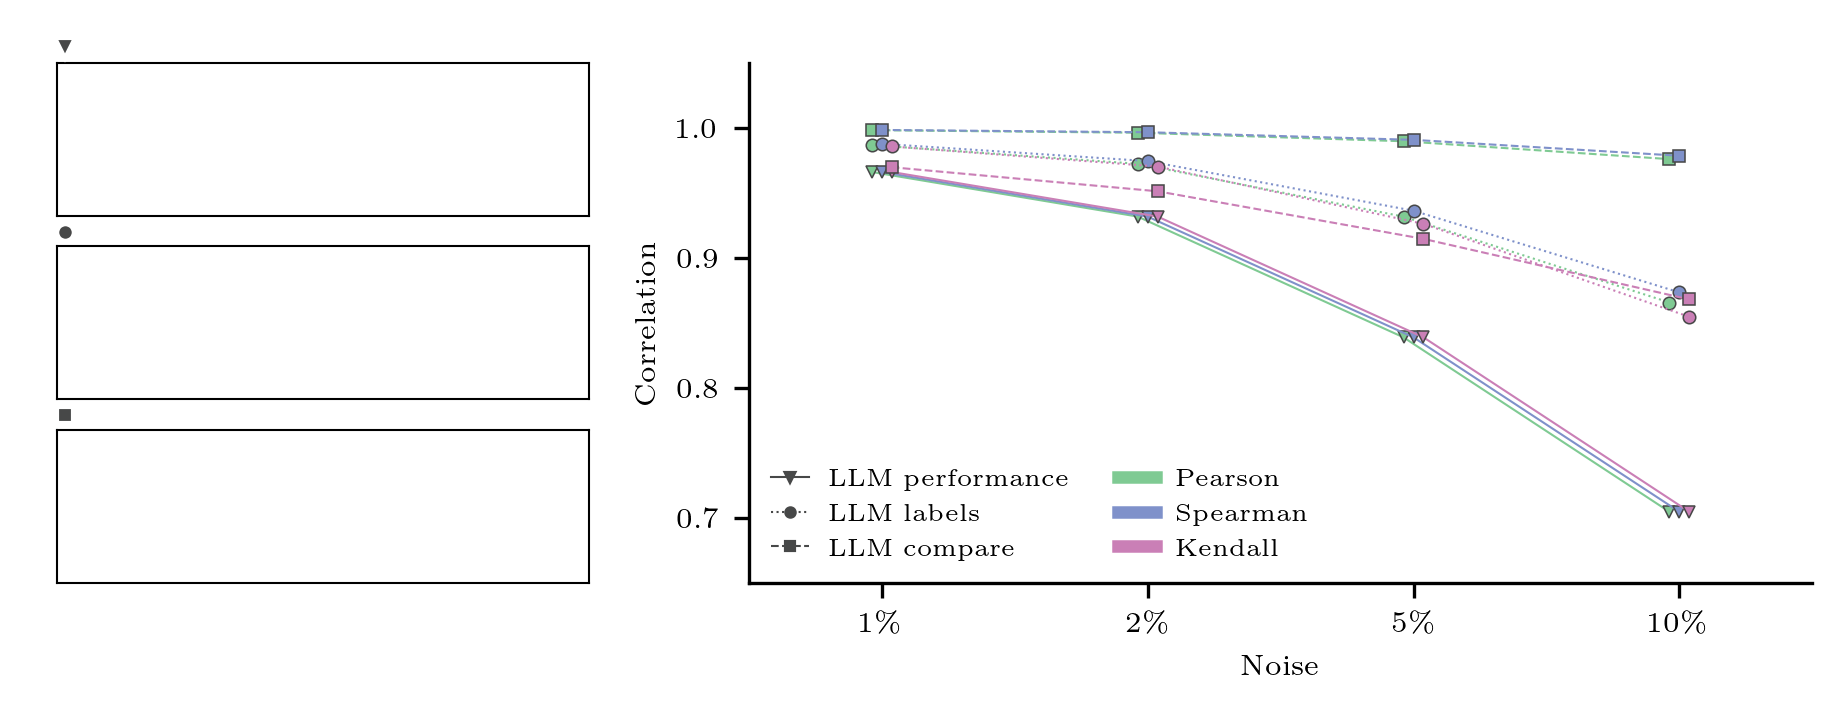

In [ ]:
Figure3, ax3 = plt.subplot_mosaic([["A1", "B"],["A2", "B"], ["A3", "B"]], figsize=(6.5, 9/4),gridspec_kw={"width_ratios":[1,2], "left":0.05, "right":0.95}, dpi=300)


hue_order = ["pearson", "spearman", "kendall"]
def offset(value, offset):
    if value == 0.01:
        return value - offset
    elif value == 0.02:
        return value - offset
    elif value == 0.05:
        return value - offset
    elif value == 0.1:
        return value - offset
    else:
        return value


#Panel B
sns.pointplot(
    data=df_long_performance_o3, x="alpha", y="correlation", ax=ax3["B"], hue="metric", palette=COLORS2, hue_order=hue_order,
    errorbar=None,
    linewidth=0.5,
    linestyles="-",
    markers="v", markersize=3, dodge=True, zorder=1,
 
)

sns.pointplot(
    data=df_long_labels_o3, x="alpha", y="correlation",
    hue="metric", hue_order=hue_order, palette=COLORS2,
    ax=ax3["B"],
    linestyles=":", 
    linewidth=0.5,
    errorbar= None,
    #errorbar=("ci", 95),
    markers="o", markersize=3, dodge=True,zorder=1,
    #err_kws={'color': 'black', 'linewidth':0.5}  error bars are so small they are just dots
       
)

sns.pointplot(
    data=df_long_bt_o3, x="alpha", y="correlation",
    hue="metric", hue_order=hue_order, palette=COLORS2,
    ax=ax3["B"],
    errorbar= None,
    linewidth=0.5,
    linestyles="--",
    #linestyles="none",
    #errorbar=("ci", 95),
    markers="s", markersize=3, dodge=True,zorder=1,
    #err_kws={'color': 'black', 'linewidth':0.5}
)


ax3["B"].get_legend().set_visible(False)
from matplotlib.lines import Line2D
labels = ['LLM performance', 'LLM labels', 'LLM compare']
custom_handles = (
    [Line2D([0], [0], marker=m, color='#474848', markerfacecolor='#474848', markersize=2, label=l, linestyle = s, linewidth=0.5)
     for m, l, s in zip(['v', 'o', 's'], labels, ['-', ':', '--'])]
    +
    [Line2D([0], [0], color=c, lw=3, label=f"{metric.capitalize()}") for c, metric in zip(COLORS2, hue_order)]
)
for line in ax3["B"].lines:
    line.set_markeredgecolor("#474848")

ax3["B"].legend(handles=custom_handles, loc='lower left', bbox_to_anchor=(0.0, 0.0), frameon=False, fontsize=6, title="", title_fontsize=7, ncol=2, handlelength=1.5)
sns.despine(ax=ax3["B"], bottom=False, left=False)
ax3["B"].set_xticklabels([r"1\%", r"2\%", r"5\%", r"10\%"], fontsize=7)
ax3["B"].set_ylim(0.65,1.05)
ax3["B"].set_yticks(ticks = [0.7, 0.8, 0.9, 1.0], labels = [r"0.7", r"0.8", r"0.9", r"1.0"], fontsize=7)
ax3["B"].set_xlabel(r"Noise", fontsize=7)
ax3["B"].set_ylabel("Correlation", fontsize=7)


# Panel A1
ax3["A1"].set_xticks([], labels=[], fontsize=7)
ax3["A1"].set_yticks([], labels=[], fontsize=7)
ax3["A1"].set_xlabel("", fontsize=7)
ax3["A1"].set_ylabel("", fontsize=7)

ax3["A1"].spines['top'].set_linewidth(0.5)
ax3["A1"].spines['right'].set_linewidth(0.5)
ax3["A1"].spines['left'].set_linewidth(0.5) 
ax3["A1"].spines['bottom'].set_linewidth(0.5)

handle = Line2D([0], [0], marker='v', color='white', markerfacecolor='#474848', markersize=5)
ax3["A1"].legend(handles=[handle], labels=[""], loc='upper left', frameon=False, fontsize=6, title="", title_fontsize=7, bbox_to_anchor=(-0.075, 1.3))

# Panel A2
ax3["A2"].set_xticks([], labels=[], fontsize=7)
ax3["A2"].set_yticks([], labels=[], fontsize=7)
ax3["A2"].set_xlabel("", fontsize=7)
ax3["A2"].set_ylabel("", fontsize=7)

ax3["A2"].spines['top'].set_linewidth(0.5)
ax3["A2"].spines['right'].set_linewidth(0.5)
ax3["A2"].spines['left'].set_linewidth(0.5)
ax3["A2"].spines['bottom'].set_linewidth(0.5)

handle = Line2D([0], [0], marker='o', color='white', markerfacecolor='#474848', markersize=4)
ax3["A2"].legend(handles=[handle], labels=[""], loc='upper left', frameon=False, fontsize=6, title="", title_fontsize=7, bbox_to_anchor=(-  0.075, 1.3))

# Panel A3
ax3["A3"].set_xticks([], labels=[], fontsize=7)
ax3["A3"].set_yticks([], labels=[], fontsize=7)
ax3["A3"].set_xlabel("", fontsize=7)
ax3["A3"].set_ylabel("", fontsize=7)

ax3["A3"].spines['top'].set_linewidth(0.5)
ax3["A3"].spines['right'].set_linewidth(0.5)
ax3["A3"].spines['left'].set_linewidth(0.5)
ax3["A3"].spines['bottom'].set_linewidth(0.5)

handle = Line2D([0], [0], marker='s', color='white', markerfacecolor='#474848', markersize=4)
ax3["A3"].legend(handles=[handle], labels=[""], loc='upper left', frameon=False, fontsize=6, title="", title_fontsize=7, bbox_to_anchor=(-0.075, 1.3))

Figure3.savefig("../figures/Figure3.pdf", dpi=300, bbox_inches='tight')
plt.show()